In [29]:
'''
(1) - Cổ phiếu phải có tín hiệu giá đang di chuyển, tiêu chí để nhận biết là giá tăng ở mức độ hợp lý (~2%)
(2) - Tiêu chí thứ 2 là phải có khối lượng tăng cao so với trung bình phía trước, để chứng tỏ là dòng tiền đang vào
(3) - Cổ phiếu phải có tín hiệu rõ ràng, chẳng hạn phục hồi từ đáy hoặc nền giá
'''

import pandas as pd
import TaiPM

#Cấu hình pandas
pd.options.display.float_format='{:,.2f}'.format
pd.set_option('display.width',85)

class StockMarketData:
    #format dd-mm-yyyy
    def __init__(self,day,month,year, san) -> None:
        day = str(day)
        month = str(month)
        year = str(year)
        if(len(day)<2):
            day = '0' + day
        if(len(month)<2):
            month = '0' + month
        #self.url = f'https://s.cafef.vn/TraCuuLichSu2/1/HOSE/{day}/{month}/{year}.chn'
        self.url = f'https://s.cafef.vn/TraCuuLichSu2/1/{san}/{day}/{month}/{year}.chn'
        print(self.url)
        
    def GetMarketData(self):
        items = pd.read_html(self.url)
        LEN = len(items)
        df = items[LEN-1]    
        df.rename(columns = {0:'Symbol', 
                            1:'Close',
                            2:'%',                         
                            3:'TC',
                            4:'TC',
                            5:'Open',
                            6:'High',
                            7:'Low',
                            8:'Volume',
                            9:'GT-TT'}, inplace = True)    
        df = df[0:len(df)-1]    
        df['Volume'] = df['Volume'].astype(float)
        df['%'] = df['%'].apply(lambda x: x.split(' ')[1][1:])
        df['%'] = df['%'].astype(float)
        df['Close'] = df['Close'].astype(float)
        df['High'] = df['High'].astype(float)
        df['Open'] = df['Open'].astype(float)
        df['Low'] = df['Low'].astype(float)
        
        return df 
        
    def GetStocksByDragonFly(self):
        df = self.GetMarketData()
        
        #Lọc theo điều kiện
        df = df[(df['High']==df['Close'])] #1: Giá đóng cửa là giá cao nhất
        df = df[df['Volume'] > 50000] #Bước 2: Thanh khoản phải lớn hơn 50k cổ phiếu
        df = df[df['%'] >= 2] #Bước 03: Biên độ lớn hơn 3%
        #df = df[df['Close'] >= 7] #Bước 04: Loại bớt các cổ phiếu penny
        
        del df['TC']
        df = df.reset_index(drop=True)
        return df
    
    def GetRecommendStocks(self):
        stocks = self.GetStocksByDragonFly()['Symbol']
        stocks = list(stocks)
        return stocks

    def ToString(self):
        print(self.url)
        print('Recommend stocks: ')
        print(self.GetRecommendStocks())



In [30]:
# #UPCOM
# class StockMarketData_UPCOM:
#     #format dd-mm-yyyy
#     def __init__(self,day,month,year) -> None:
#         day = str(day)
#         month = str(month)
#         year = str(year)
#         if(len(month)<2):
#             month = '0' + month
#         #self.url = f'https://s.cafef.vn/TraCuuLichSu2/1/HOSE/{day}/{month}/{year}.chn'
#         self.url = f'https://s.cafef.vn/TraCuuLichSu2/1/UPCOM/{day}/{month}/{year}.chn'
#         print(self.url)
        
#     def GetMarketData(self):
#         items = pd.read_html(self.url)
#         #print(items)
#         LEN = len(items)
#         df = items[LEN-1]
        
#         del df['4']
#         print(df)
#         df.rename(columns = {0:'Symbol', #Mã
#                             1:'Close',  #Đóng cửa
#                             2:'Avg',      #AVG                      
#                             3:'%',
#                             4:'TC',
#                             5:'Open',
#                             6:'High',
#                             7:'Low',
#                             8:'Volume',
#                             9:'GT-TT'}, inplace = True)    
#         df = df[0:len(df)-1]    
#         df['Volume'] = df['Volume'].astype(float)
#         df['%'] = df['%'].apply(lambda x: x.split(' ')[1][1:])
#         df['%'] = df['%'].astype(float)
#         df['Close'] = df['Close'].astype(float)
#         df['High'] = df['High'].astype(float)
#         df['Open'] = df['Open'].astype(float)
#         df['Low'] = df['Low'].astype(float)
#         print(df)
#         return df 
        
#     def GetStocksByDragonFly(self):
#         df = self.GetMarketData()
        
#         #Lọc theo điều kiện
#         df = df[(df['High']==df['Close'])] #1: Giá đóng cửa là giá cao nhất
#         #df = df[df['Volume'] > 50000] #Bước 2: Thanh khoản phải lớn hơn 50k cổ phiếu
#        # df = df[df['%'] >= 3] #Bước 03: Biên độ lớn hơn 3%
#         #df = df[df['Close'] >= 7] #Bước 04: Loại bớt các cổ phiếu penny
        
#         #del df['TC']
#         df = df.reset_index(drop=True)
#         return df
    
#     def GetRecommendStocks(self):
#         stocks = self.GetStocksByDragonFly()['Symbol']
#         stocks = list(stocks)
#         return stocks

#     def ToString(self):
#         print(self.url)
#         print('Recommend stocks: ')
#         print(self.GetRecommendStocks())
        
# upcom = StockMarketData_UPCOM(3,8,2022)
# #upcom_stocks = upcom.GetMarketData()
# upcom_stocks = upcom.GetRecommendStocks()

In [31]:
import Stock

#1. HOSE : Sàn sài gòn
#2. HASTC: Sàn Hà Nội
#3. UPCOM: Sàn UPCOM

#market = StockMarketData(day=TaiPM.THIS_DAY,month=TaiPM.THIS_MONTH,year=TaiPM.THIS_YEAR, san='HOSE')
san = ['HOSE','HASTC','UPCOM']
all_stocks = []
for item in san:
    try:
        market = StockMarketData(day=26,month=TaiPM.THIS_MONTH,year=TaiPM.THIS_YEAR, san=item)
        market.ToString()
        stocks = market.GetRecommendStocks()
        all_stocks.append(stocks)
    except:
        print(f'Lỗi sàn {item}')
print(all_stocks)
    

https://s.cafef.vn/TraCuuLichSu2/1/HOSE/24/08/2022.chn
https://s.cafef.vn/TraCuuLichSu2/1/HOSE/24/08/2022.chn
Recommend stocks: 


/var/folders/yh/8sh178dj7m57vt5x3pxmjw3c0000gn/T/ipykernel_4334/2269228282.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volume'] = df['Volume'].astype(float)
/var/folders/yh/8sh178dj7m57vt5x3pxmjw3c0000gn/T/ipykernel_4334/2269228282.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['%'] = df['%'].apply(lambda x: x.split(' ')[1][1:])
/var/folders/yh/8sh178dj7m57vt5x3pxmjw3c0000gn/T/ipykernel_4334/2269228282.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

['TTB', 'TLD', 'TSC', 'PAN', 'GMC', 'ABS', 'VRC', 'ASP', 'AGM', 'EVE', 'ADG', 'CTS', 'OGC', 'CTR', 'VPH', 'TEG']


/var/folders/yh/8sh178dj7m57vt5x3pxmjw3c0000gn/T/ipykernel_4334/2269228282.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volume'] = df['Volume'].astype(float)
/var/folders/yh/8sh178dj7m57vt5x3pxmjw3c0000gn/T/ipykernel_4334/2269228282.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['%'] = df['%'].apply(lambda x: x.split(' ')[1][1:])
/var/folders/yh/8sh178dj7m57vt5x3pxmjw3c0000gn/T/ipykernel_4334/2269228282.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

https://s.cafef.vn/TraCuuLichSu2/1/HASTC/24/08/2022.chn
https://s.cafef.vn/TraCuuLichSu2/1/HASTC/24/08/2022.chn
Recommend stocks: 


/var/folders/yh/8sh178dj7m57vt5x3pxmjw3c0000gn/T/ipykernel_4334/2269228282.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volume'] = df['Volume'].astype(float)


Lỗi sàn HASTC
https://s.cafef.vn/TraCuuLichSu2/1/UPCOM/24/08/2022.chn
https://s.cafef.vn/TraCuuLichSu2/1/UPCOM/24/08/2022.chn
Recommend stocks: 
Lỗi sàn UPCOM
[['TTB', 'TLD', 'TSC', 'PAN', 'GMC', 'ABS', 'VRC', 'ASP', 'AGM', 'EVE', 'ADG', 'CTS', 'OGC', 'CTR', 'VPH', 'TEG']]


/var/folders/yh/8sh178dj7m57vt5x3pxmjw3c0000gn/T/ipykernel_4334/2269228282.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volume'] = df['Volume'].astype(float)


In [32]:

lst = []
errors = []
for symbol in stocks:
    try:
        s = Stock.Stock(symbol)    
        s.Prepare()
        lst.append(
            [
                s.name,
                s.Get_TyLeSong(T=10,percent=3),
                s.Money
             ]) #Độ dao động giá = 3%
    except:
        errors.append(symbol)

df = pd.DataFrame(lst,columns=['Symbol','Ratio','Money'])
df = df.sort_values(by=['Ratio'],ascending=False)
df = df.reset_index(drop=True)
print(df)
    

#XẾP HẠNG THEO TỶ LỆ SÓNG


Cổ phiếu chưa có trong danh mục
Cổ phiếu chưa có trong danh mục
Cổ phiếu chưa có trong danh mục
Cổ phiếu chưa có trong danh mục
Cổ phiếu chưa có trong danh mục
   Symbol  Ratio          Money
0     CTS   0.60  33,319,440.00
1     GMC   0.40   6,381,870.00
2     TSC   0.30  41,489,063.00
3     PAN   0.30 110,709,680.00
4     VPH   0.20   2,166,710.00
5     TLD   0.10   6,264,749.00
6     VRC   0.10   4,572,630.00
7     ASP   0.10   3,638,166.00
8     ADG   0.10   5,250,000.00
9     CTR   0.10  37,787,580.00
10    OGC   0.00   7,341,830.00


In [33]:
print(errors)

['TTB', 'ABS', 'AGM', 'EVE', 'TEG']


TTB
Cổ phiếu chưa có trong danh mục
TLD


No handles with labels found to put in legend.


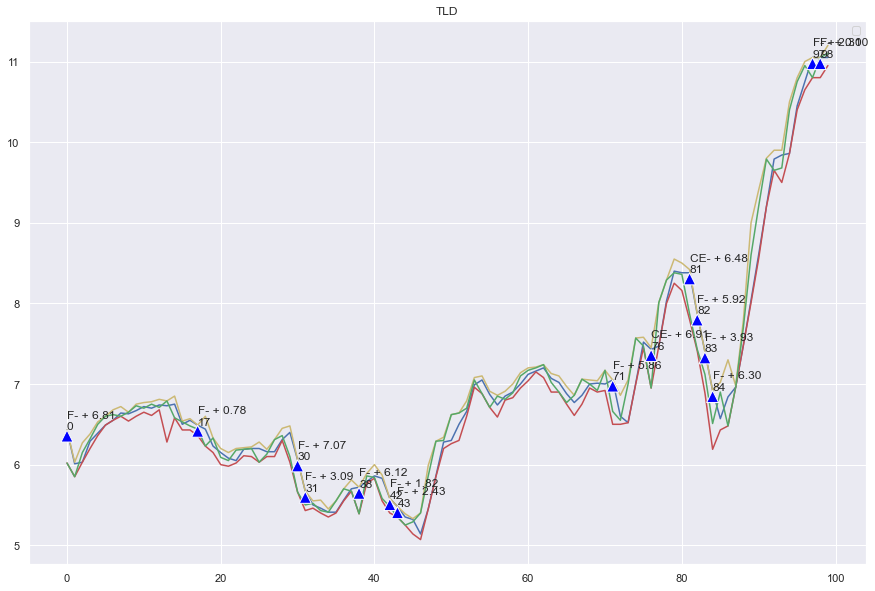

TSC


No handles with labels found to put in legend.


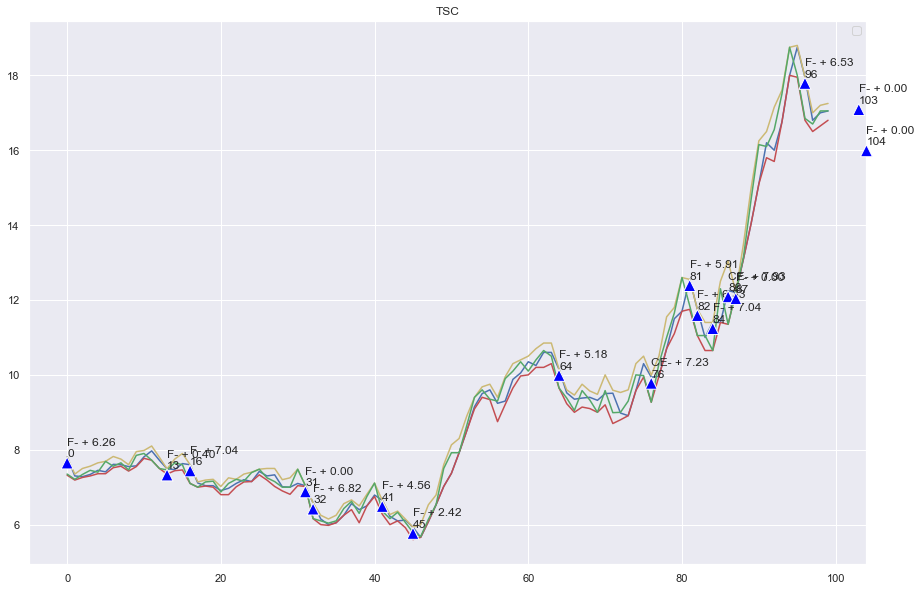

PAN


No handles with labels found to put in legend.


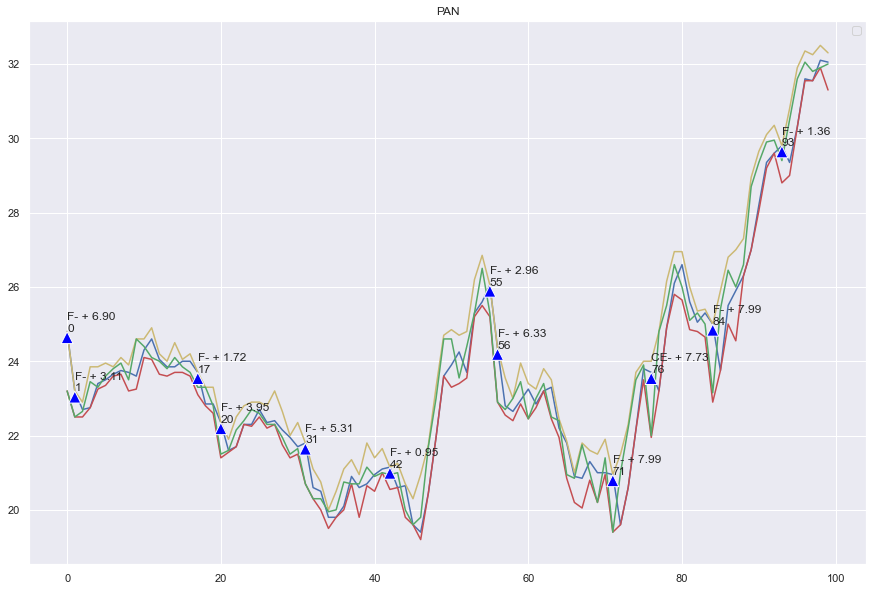

GMC


No handles with labels found to put in legend.


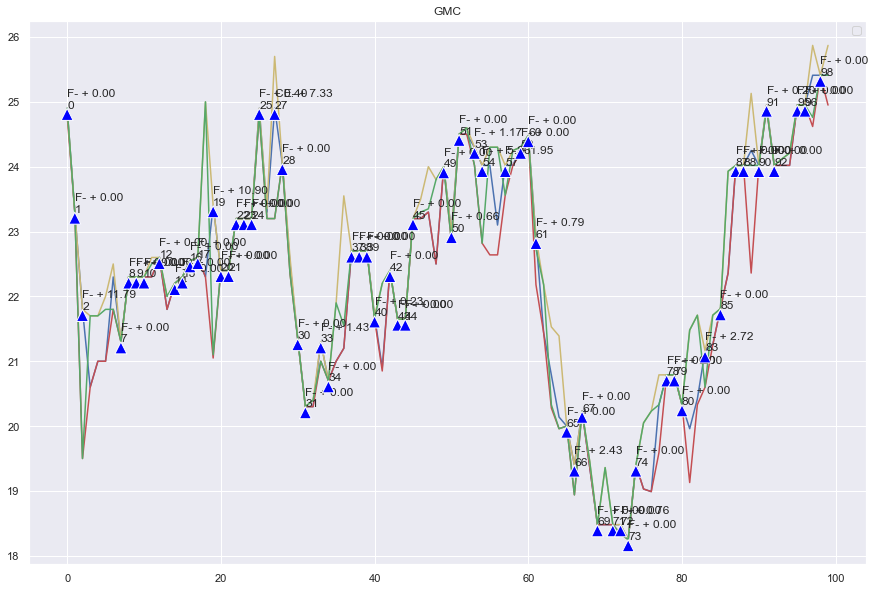

ABS
Cổ phiếu chưa có trong danh mục
VRC


No handles with labels found to put in legend.


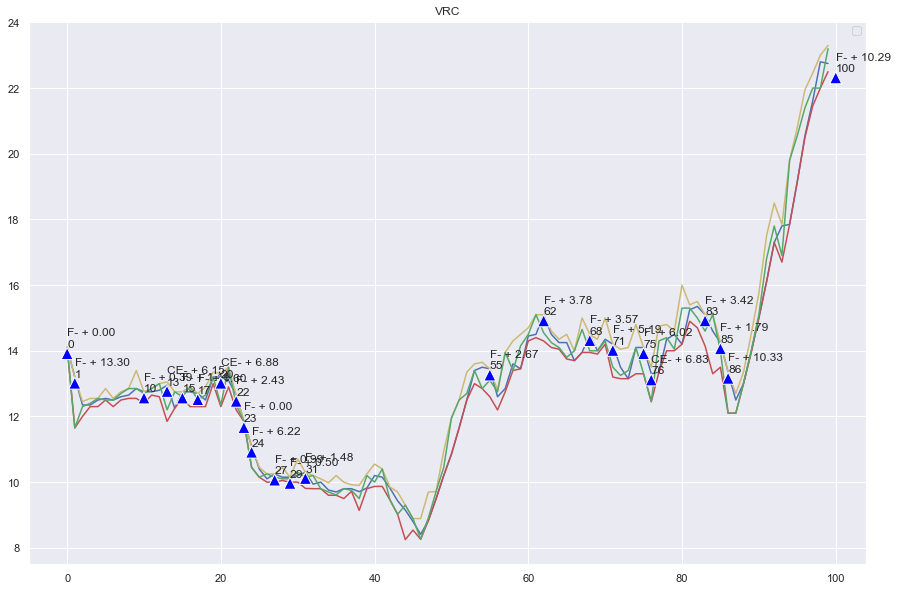

ASP


No handles with labels found to put in legend.


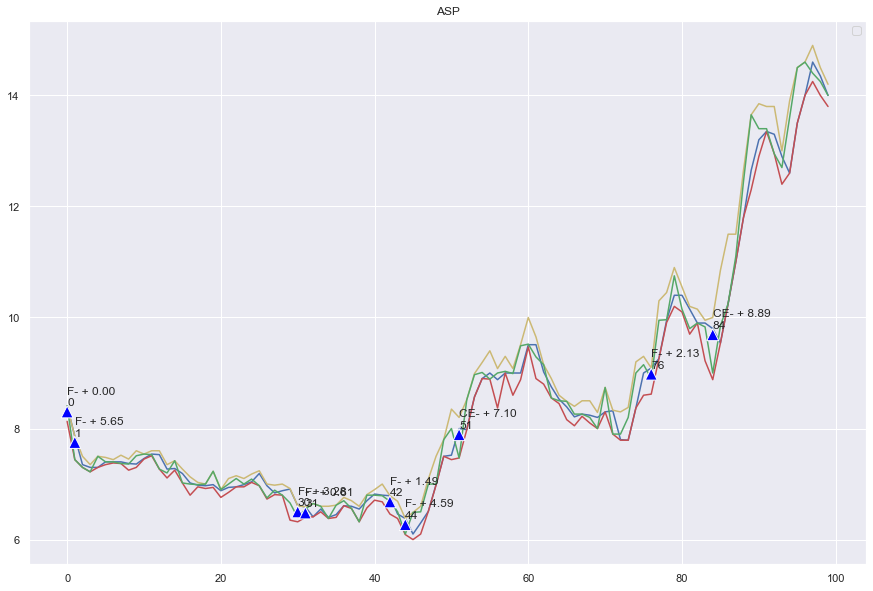

AGM
Cổ phiếu chưa có trong danh mục
EVE
Cổ phiếu chưa có trong danh mục
ADG


No handles with labels found to put in legend.


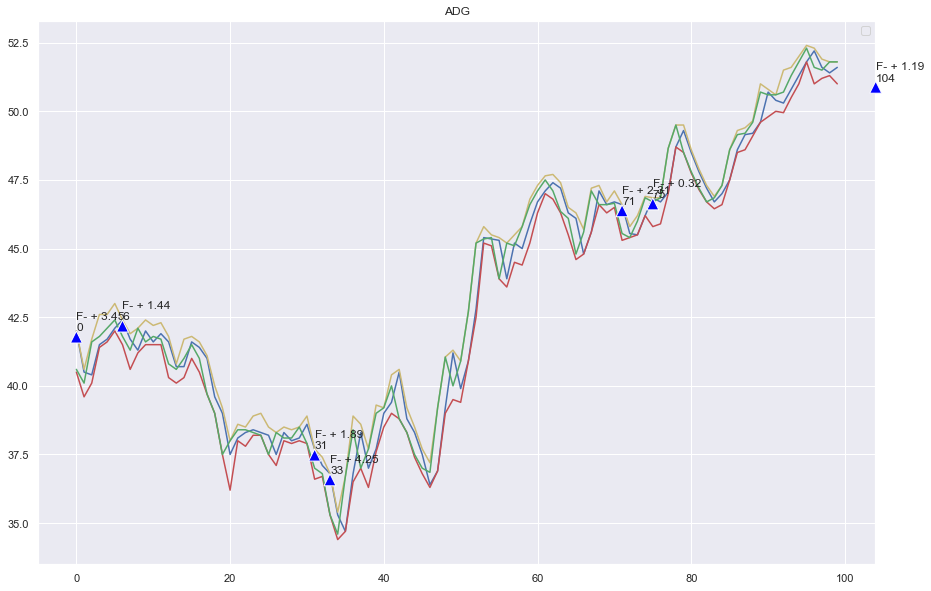

CTS


No handles with labels found to put in legend.


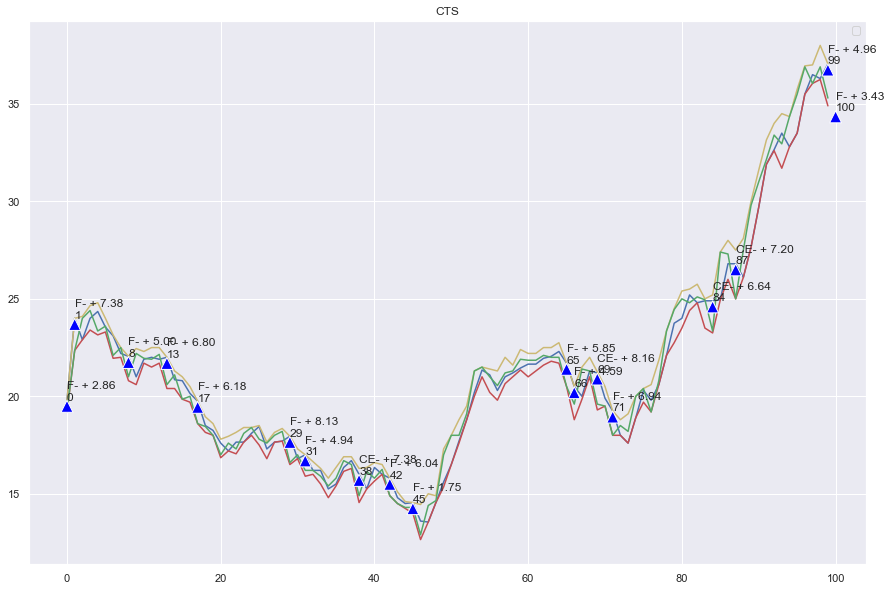

OGC


No handles with labels found to put in legend.


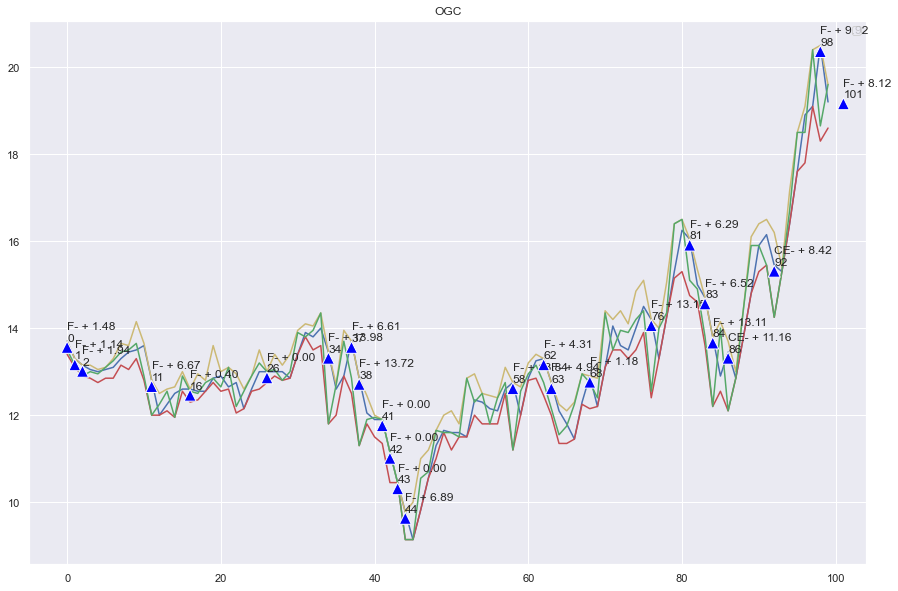

CTR


No handles with labels found to put in legend.


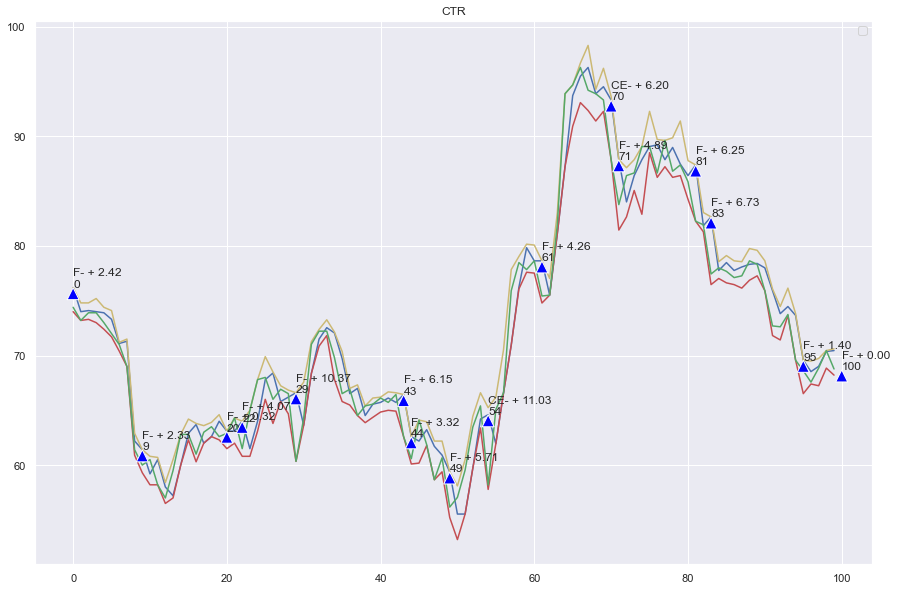

VPH


No handles with labels found to put in legend.


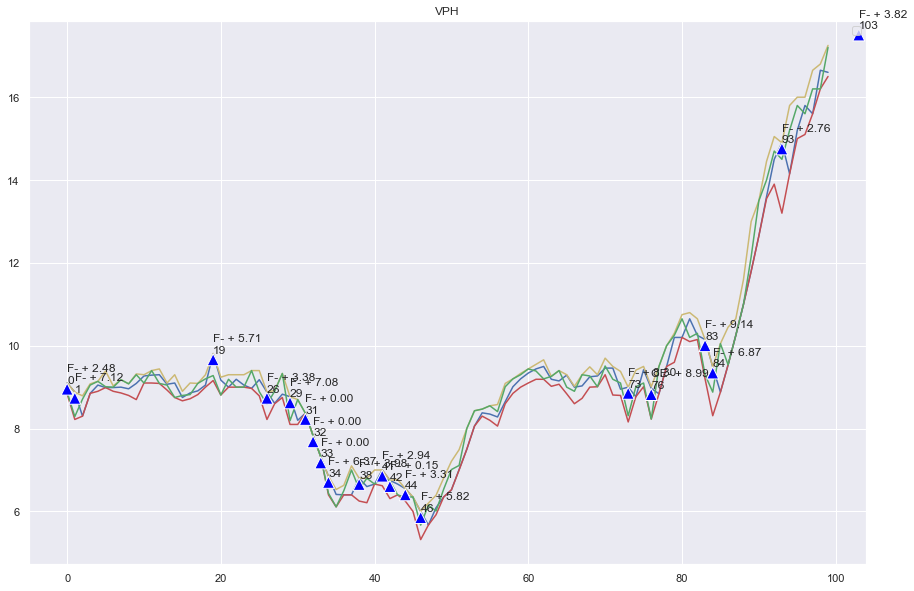

TEG
Cổ phiếu chưa có trong danh mục
Danh sách các cổ phiếu lỗi do chưa có dữ liệu trong API ['TTB', 'ABS', 'AGM', 'EVE', 'TEG']


In [34]:
from time import sleep

errors = []
for symbol in stocks:
    try:
        print(symbol)
        s = Stock.Stock(name=symbol)
        s.Prepare()
        s.DrawWithForcecast(100)
        sleep(1)
    except:
        errors.append(symbol)
if(len(errors)>0):
    print(f'Danh sách các cổ phiếu lỗi do chưa có dữ liệu trong API {errors}')

In [35]:
import MyDocX
doc = MyDocX.MyDocX("daily",'report')

df_stocks = GetStocksByDragonFly()
doc.AddContent(df_stocks.to_markdown())


NameError: name 'GetStocksByDragonFly' is not defined